In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('train:', mnist.train.num_examples)
print('validation:', mnist.validation.num_examples)
print('test:', mnist.test.num_examples)

train: 55000
validation: 5000
test: 10000


In [4]:
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels

print("train_img's\n type: {0} \n dim: {1}".format(type(train_img), train_img.shape)) # 28*28 = 784
print("="*50, "\n")
print("train_label's\n type: {0} \n dim: {1}".format(type(train_label), train_label.shape)) # 0~9 , one hot encoding

train_img's
 type: <class 'numpy.ndarray'> 
 dim: (55000, 784)

train_label's
 type: <class 'numpy.ndarray'> 
 dim: (55000, 10)


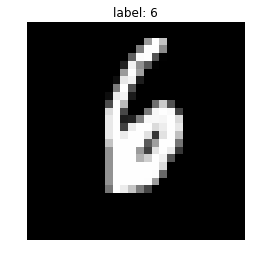

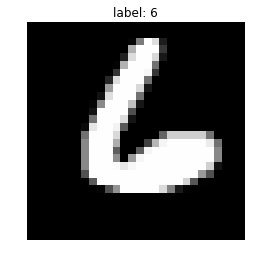

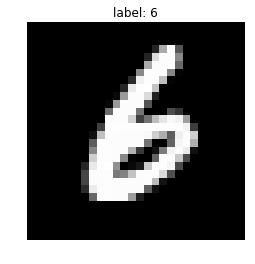

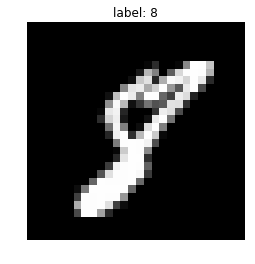

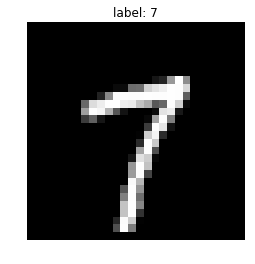

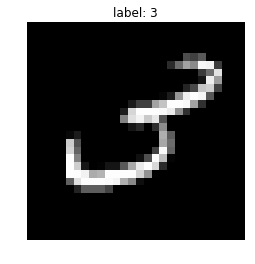

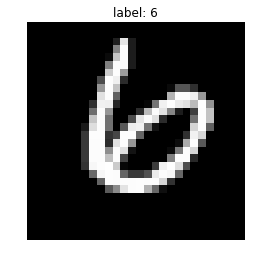

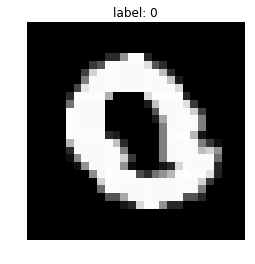

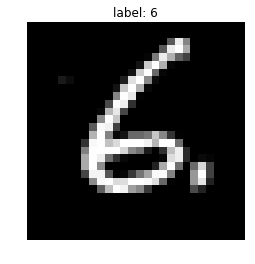

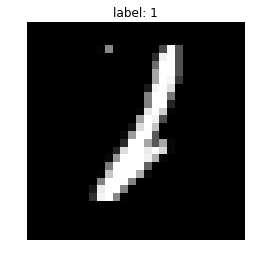

In [5]:
for i in np.random.randint(low=0, high=train_img.shape[0], size = 10):
    img2viz = np.reshape(train_img[i, :], [28, 28])
    plt.axis('off')
    plt.title('label: {0}'.format(np.argmax(train_label[i,:])))
    plt.imshow(img2viz, cmap=plt.get_cmap('gray'))
    plt.show()

In [6]:
training_epochs = 1000
learning_rate = 0.05
batch_size = 100
display_step = 100

In [7]:
x = tf.placeholder('float', [None, 784]) # 28 * 28
y = tf.placeholder('float', [None, 10]) # 0~9

In [8]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
evidence = tf.matmul(x, W) + b
activation = tf.nn.softmax(evidence)

In [10]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=evidence , labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
correct_pred = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [12]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
        sess.run(optimizer, feed_dict={x:batch_xs, y:batch_ys})
        if ((epoch+1) % display_step==0) | (epoch==0):
            #print("Epoch:", "%04d"%(epoch+1))
            acc = sess.run(accuracy, feed_dict={x:batch_xs, y:batch_ys})
            loss = sess.run(cost, feed_dict={x:batch_xs, y:batch_ys})
            print("Epoch " + "%04d"%(epoch+1) + ", Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
    print("="*50)
    print("Finished.")
    print("="*50)
    correct_prediction = tf.equal(tf.argmax(activation, axis=1), tf.argmax(y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))
    print("Model accuracy: ", accuracy.eval({ x:mnist.test.images, y:mnist.test.labels}))

Epoch 0001, Loss= 2.223022, Training Accuracy= 0.60000
Epoch 0100, Loss= 0.819457, Training Accuracy= 0.85000
Epoch 0200, Loss= 0.653258, Training Accuracy= 0.81000
Epoch 0300, Loss= 0.668374, Training Accuracy= 0.85000
Epoch 0400, Loss= 0.484695, Training Accuracy= 0.89000
Epoch 0500, Loss= 0.412774, Training Accuracy= 0.92000
Epoch 0600, Loss= 0.383767, Training Accuracy= 0.91000
Epoch 0700, Loss= 0.365415, Training Accuracy= 0.93000
Epoch 0800, Loss= 0.339124, Training Accuracy= 0.88000
Epoch 0900, Loss= 0.397922, Training Accuracy= 0.92000
Epoch 1000, Loss= 0.347442, Training Accuracy= 0.92000
Finished.
Model accuracy:  0.9017


In [13]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [14]:
len([np.argmax(row) for row in train_label])

55000

In [15]:
clf.fit(train_img, [np.argmax(row) for row in train_label]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

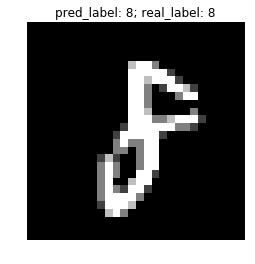

In [16]:
i = 30
pred_val = clf.predict(train_img[i,:].reshape(1, -1))

img2viz = np.reshape(train_img[i, :], [28, 28])
plt.axis('off')
plt.title('pred_label: {0}; real_label: {1}'.format(pred_val[0], np.argmax(train_label[i, :])))
plt.imshow(img2viz, cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
clf.score(test_img, [np.argmax(row) for row in test_label])

0.97170000000000001

In [18]:
pred_val = clf.predict(test_img)

In [19]:
np.mean(pred_val==np.array([np.argmax(row) for row in test_label]))

0.97170000000000001